# Final Project

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy import misc
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
%matplotlib inline

# Importing of data

In [2]:
'''
   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
'''
# Manually add all the column names, so we can address the dataframe columns by name
column_names = ['Code Number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

# importing data
raw_data = pd.read_csv('breast-cancer-wisconsin.data', names=column_names, header=None)

# Remove all rows that have a missing value
### Since we only have 16 records with a missing value, it is easier and better to remove those records than guess the values

In [3]:
# Go through each column of the dataframe
for col in column_names:
    # Only keep rows where the given column has a valid value (an invalid value is '?')
    raw_data = raw_data[1 ^ (raw_data[col] == '?')]

C:\Users\Noah Saffie\.conda\envs\Healthcare\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


# Cast the data into numerical form
### Since the data only conists of integers, we can simply cast the whole dataframe to type int

In [4]:
# Casting the dataframe and saving it to a new variable
numerical_data = raw_data.astype('int32')
# Output the type of every column
numerical_data.dtypes

Code Number                    int32
Clump Thickness                int32
Uniformity of Cell Size        int32
Uniformity of Cell Shape       int32
Marginal Adhesion              int32
Single Epithelial Cell Size    int32
Bare Nuclei                    int32
Bland Chromatin                int32
Normal Nucleoli                int32
Mitoses                        int32
Class                          int32
dtype: object

# Separate out the target 'Class'

In [5]:
# Drop the unneeded index
numerical_data = numerical_data.reset_index(drop=True)
# Separate the input into its own dataframe
data_input = numerical_data.drop(['Class'], axis=1)
# Save target values to it's own variable
target = numerical_data['Class']

# Perform normalization on the data
### Don't normalize the target 'Class'

In [6]:
from sklearn.preprocessing import Normalizer
# Setup the transformer based on the inputs
transformer = Normalizer().fit(data_input)
# Modify the data using transformer so that every value is between [0, 1]
normalized_inputs = transformer.transform(data_input)
# Save the normalized inputs as a dataframe
normalized_inputs = pd.DataFrame(data=normalized_inputs, index=None, columns=data_input.columns)
# Make another copy of the normalized inputs
normalized_data = normalized_inputs.copy()
# Add the class back into the normalized data copy
normalized_data['Class'] = list(target)

# Visulize a Correlation Matrix Heatmap
### Normalized data peforms MUCH better than unnormalized data
### Code taken from 'Art of Effective Visualization' (https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57) with minor modications

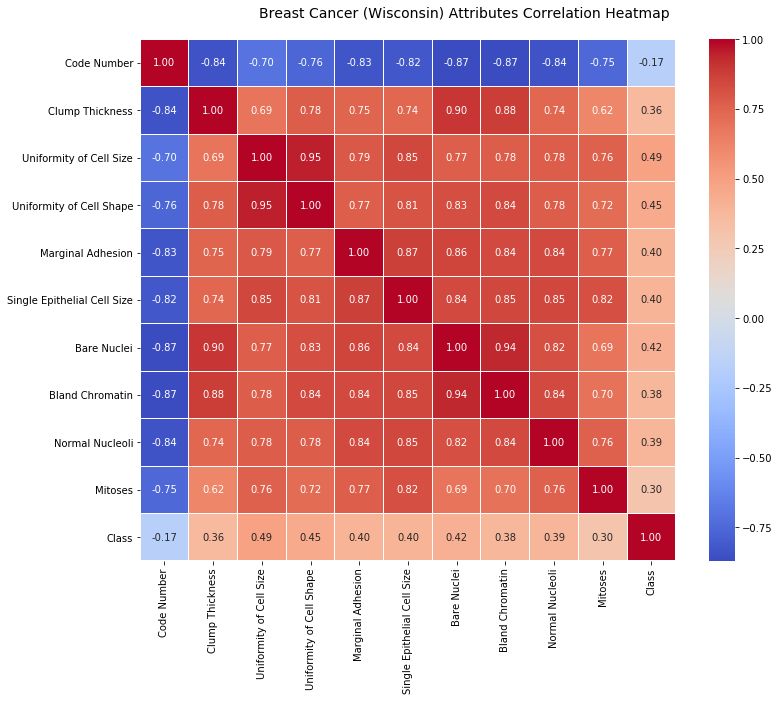

In [7]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(12, 9))
correlation = normalized_data.corr()
heatmap = sns.heatmap(round(correlation,2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Breast Cancer (Wisconsin) Attributes Correlation Heatmap', fontsize=14)
f.savefig('heatmap.png', bbox_inches='tight')

# Class distributions
## Un-normalized because normalized makes the scale to small
### Code taken from 'Art of Effective Visualization' (https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57) with minor modications

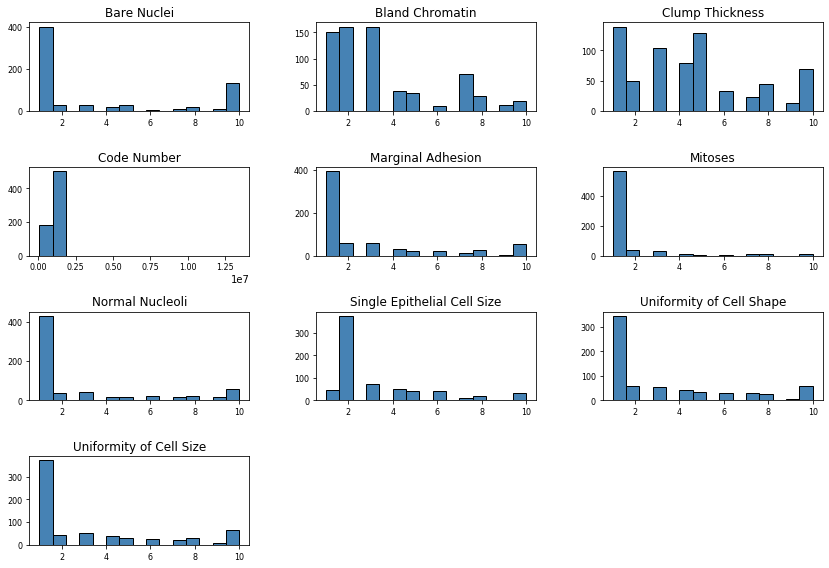

In [8]:
data_input.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2)) 
plt.savefig('histograms.png', bbox_inches='tight')

# Class Distributions - With separation of target class
### Code taken from 'Art of Effective Visualization' (https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57) with minor modications

In [17]:
for col in column_names:
    fig = plt.figure(figsize = (6, 4))
    ax = sns.countplot(x=col, hue="Class", data=numerical_data, palette={2: "blue", 4: "orange"})
    # Multi-bar Plot
    #cp = sns.countplot(x=col, hue="Class", data=numerical_data, palette={2: "blue", 4: "orange"})
    ax.legend(title='Class')
    plt.savefig('dist_' + col + '.png', bbox_inches='tight')
    plt.close(fig)

# Pair-Wise plots
### Not very useful, hard to read and results seem to indicate very heavy overlap of the classes
### Code taken from 'Art of Effective Visualization' (https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57) with minor modications

In [ ]:
# # Scatter Plot with Hue for visualizing data in 3-D
# pp = sns.pairplot(numerical_data[column_names], hue='Class', size=4, aspect=1.8, 
#                   palette={2: "#FF9999", 4: "#FFE888"},
#                   plot_kws=dict(edgecolor="black", linewidth=0.5))
# fig = pp.fig 
# fig.subplots_adjust(top=0.93, wspace=0.3)
# t = fig.suptitle('Breast Cancer Attributes Pairwise Plots', fontsize=14)
# fig.savefig('pair_wise.png', bbox_inches='tight')

# 4D Plots for all attributes
### Test out every 3-combination of atttributes that aren't the target class
### Then we indicate the values of the target class by the color, blue for benign, and orange for malignant
### Not particularly useful simply due to the sheer number of graphs that are generated
### Code taken from 'Art of Effective Visualization' (https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57) with minor modications

In [ ]:
# columns = normalized_inputs.columns
# from itertools import chain, combinations

# # For every 3-combination among the the non-target attributes
# for s in combinations(columns, 3):
#     # Set the column name to an axis
#     x_column, y_column, z_column = s
#     fig = plt.figure(figsize=(8, 6))
#     ax = fig.add_subplot(111, projection='3d')
#     # Label graph with appropriate axises
#     t = fig.suptitle(x_column + ' ' + y_column + ' ' + z_column, fontsize=14)

#     # Put data into list form
#     xs = list(normalized_inputs[x_column])
#     ys = list(normalized_inputs[y_column])
#     zs = list(normalized_inputs[z_column])
#     # Zip up the data points
#     data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
#     # Color the target values
#     color = ['blue' if q == 2 else 'orange' for q in list(target)]
    
#     # For each and every data point add it to the scatter graph
#     for data, color_ in zip(data_points, color):
#         x, y, z = data
#         ax.scatter(x, y, z, alpha=0.4, c=color_)

#     # Label each of the axises
#     ax.set_xlabel(x_column)
#     ax.set_ylabel(y_column)
#     ax.set_zlabel(z_column)
#     # Save the figure
#     fig.savefig('Pairwise/' + x_column + '_' + y_column + '_' + z_column + '.png', bbox_inches='tight')
#     # Close the figure, otherwise it will overload memory of computer
#     plt.close(fig)

# Training #1
### Use normalized data
### Uses the following models: Naive Bayes' Gaussian, Neural Network Multi-Layer Perceptron, Support Vector Machine, Decision Tree
### All models are right off the shelf, from the scikit-learn website (https://scikit-learn.org/stable/user_guide.html)
### Use the stratify option (sample by class) for train test split

In [ ]:
X, y = normalized_inputs, target
# Split up the data into train and test data
# Split the data into 20% test, 80% train
# Random state doesn't matter just used arbitrary 360
# Use stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=360, stratify=y)

# Off the shelf Naive Bayes' Gaussian Model
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print('Naive Bayes Gaussian')
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)
# Off the shelf Multi-Layer Perceptron (Neural Network)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print('Multi-layer Perceptron')
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)
# Off the shelf Support Vector Machine model
clf = svm.SVC()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print('SVM')
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)
# Off the sheld Decision Tree model
clf = tree.DecisionTreeClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print('Decision Tree')
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

# Training #2 (Without attribute 'Bare Nuclei')
### Use normalized data
### Uses the following models: Naive Bayes' Gaussian, Neural Network Multi-Layer Perceptron, Support Vector Machine, Decision Tree
### All models are right off the shelf, from the scikit-learn website (https://scikit-learn.org/stable/user_guide.html)
### Use the stratify option (sample by class) for train test split

In [ ]:
noramlized_inputs_less_attr = normalized_inputs.drop(['Bare Nuclei'], axis=1)
X, y = noramlized_inputs_less_attr, target
# Split up the data into train and test data
# Split the data into 20% test, 80% train
# Random state doesn't matter just used arbitrary 360
# Use stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=360, stratify=y)

# Off the shelf Naive Bayes' Gaussian Model
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print('Naive Bayes Gaussian')
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)
# Off the shelf Multi-Layer Perceptron (Neural Network) Model
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print('Multi-layer Perceptron')
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)
# Off the shelf Support Vector Machine Model
clf = svm.SVC()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print('SVM')
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)
# Off the shelf Decision Tree Model
clf = tree.DecisionTreeClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print('Decision Tree')
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

# Take a look at the class balance based on target class
### We can see that the majority class is benign (value == 2)
### Used code from article (https://elitedatascience.com/imbalanced-classes)

In [ ]:
raw_data['Class'].value_counts()

# Class Balancing #1 - Upsampling
### Used code from article (https://elitedatascience.com/imbalanced-classes)

In [ ]:
from sklearn.utils import resample
# Separate data by if it represents the majority or minority class
normalized_data_majority = normalized_data[normalized_data.Class==2]
normalized_data_minority = normalized_data[normalized_data.Class==4]

# Upsample minority class
normalized_data_minority_upsampled = resample(normalized_data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=444,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
normalized_data_upsampled = pd.concat([normalized_data_majority, normalized_data_minority_upsampled])
 
# Display new class counts
normalized_data_upsampled.Class.value_counts()

# Training #3 - Using Upsampled Data

In [ ]:
normalized_inputs = normalized_data_upsampled.drop(['Class'], axis=1)
target = normalized_data_upsampled['Class']

X, y = normalized_inputs, target
# Split up the data into train and test data
# Split the data into 20% test, 80% train
# Random state doesn't matter just used arbitrary 360
# Use stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=360, stratify=y)

# Off the shelf Naive Bayes' Gaussian Model
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print('Naive Bayes Gaussian')
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)
# Off the shelf Multi-Layer Perceptron (Neural Network) Model
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print('Multi-layer Perceptron')
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)
# Off the shelf Support Vector Machine Model
clf = svm.SVC()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print('SVM')
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)
# Off the shelf Decision Tree Model
clf = tree.DecisionTreeClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print('Decision Tree')
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

# Class Balancing #2 - Downsampling
### Used code from article (https://elitedatascience.com/imbalanced-classes)

In [ ]:
# Separate majority and minority classes
normalized_data_majority = normalized_data[normalized_data.Class==2]
normalized_data_minority = normalized_data[normalized_data.Class==4]
 
# Downsample majority class
normalized_data_majority_downsampled = resample(normalized_data_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=239,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
normalized_data_downsampled = pd.concat([normalized_data_majority_downsampled, normalized_data_minority])
 
# Display new class counts
normalized_data_downsampled.Class.value_counts()

# Training #4 - Using Downsampled Data

In [ ]:
normalized_inputs = normalized_data_upsampled.drop(['Class'], axis=1)
target = normalized_data_upsampled['Class']

X, y = normalized_inputs, target
# Split up the data into train and test data
# Split the data into 20% test, 80% train
# Random state doesn't matter just used arbitrary 360
# Use stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=360, stratify=y)

# Off the shelf Naive Bayes' Gaussian Model
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print('Naive Bayes Gaussian')
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)
# Off the shelf Multi-Layer Perceptron (Neural Network) Model
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print('Multi-layer Perceptron')
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)
# Off the shelf Support Vector Machine Model
clf = svm.SVC()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print('SVM')
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)
# Off the shelf Decision Tree Model
clf = tree.DecisionTreeClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print('Decision Tree')
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)